In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [88]:
# Model Parameter
mu = 1.2 # 1.2 - 1.32 - 1.385 - 1.43 - 1.55 - 1.65

# Sample Time
dt = 0.01

# Simulation Time
N = 50000
t = np.arange(N)*dt

# Initial Values
x0 = .5
y0 = .5
z0 = .5

In [89]:
# Dynamics of The Model
def f(x, y, z):
    xdot = x*0.5 - x*0.5*x + x*0.5 - x*0.5*y + x*0.1 - x*0.1*z
    ydot = -y*0.5 + y*0.5*x - y*0.1 + y*0.1*y + y*0.1 - y*0.1*z
    zdot = z*mu - z*mu*x + z*0.1 - z*0.1*y + z*0.1 - z*0.1*z
    return xdot, ydot, zdot

In [90]:
# State Transition using Runge-Kutta Method
def next(x, y, z):
    xdot1, ydot1, zdot1 = f(x, y, z)
    xdot2, ydot2, zdot2 = f(x + xdot1*dt/2, y + ydot1*dt/2, z + zdot1*dt/2)
    xdot3, ydot3, zdot3 = f(x + xdot2*dt/2, y + ydot2*dt/2, z + zdot2*dt/2)
    xdot4, ydot4, zdot4 = f(x + xdot3*dt, y + ydot3*dt, z + zdot3*dt)
    xnew = x + (xdot1 + 2*xdot2 + 2*xdot3 + xdot4)*dt/6
    ynew = y + (ydot1 + 2*ydot2 + 2*ydot3 + ydot4)*dt/6
    znew = z + (zdot1 + 2*zdot2 + 2*zdot3 + zdot4)*dt/6
    return xnew, ynew, znew

In [91]:
# Simulation Loop
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
x[0] = x0
y[0] = y0
z[0] = z0
for k in range(N-1):
    x[k+1], y[k+1], z[k+1] = next(x[k], y[k], z[k])

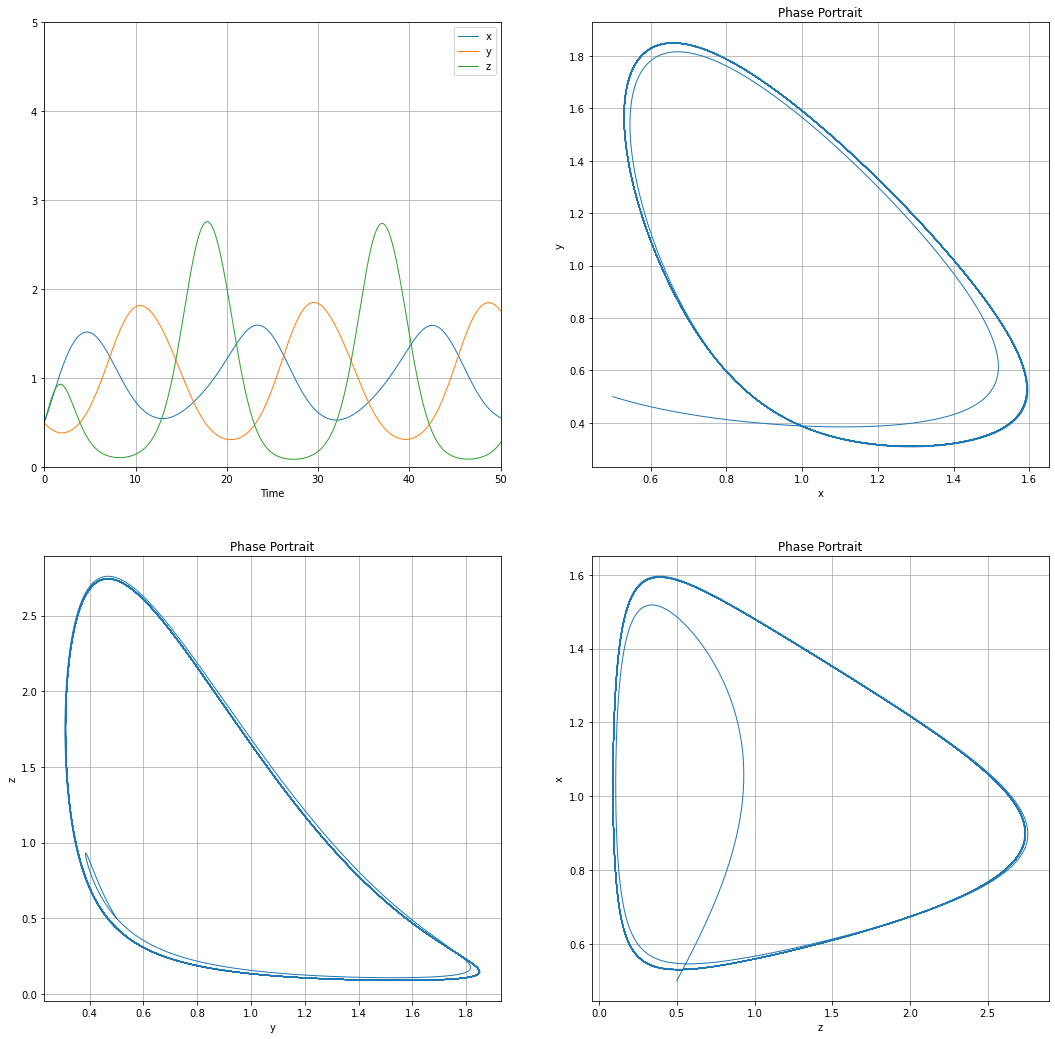

In [92]:
# Plot Results
plt.figure(figsize=(18, 18))
plt.subplot(2,2,1)
plt.plot(t, x, label='x', linewidth=1)
plt.plot(t, y, label='y', linewidth=1)
plt.plot(t, z, label='z', linewidth=1)
plt.grid()
plt.legend(loc = 'upper right')
plt.ylim(0, 5)
plt.xlim(0, 50)
plt.xlabel('Time')

plt.subplot(2,2,2)
plt.plot(x, y, linewidth=1)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')

plt.subplot(2,2,3)
plt.plot(y, z, linewidth=1)
plt.grid()
plt.xlabel('y')
plt.ylabel('z')
plt.title('Phase Portrait')

plt.subplot(2,2,4)

plt.plot(z, x, linewidth=1)
plt.grid()
plt.xlabel('z')
plt.ylabel('x')
plt.title('Phase Portrait')

plt.show()

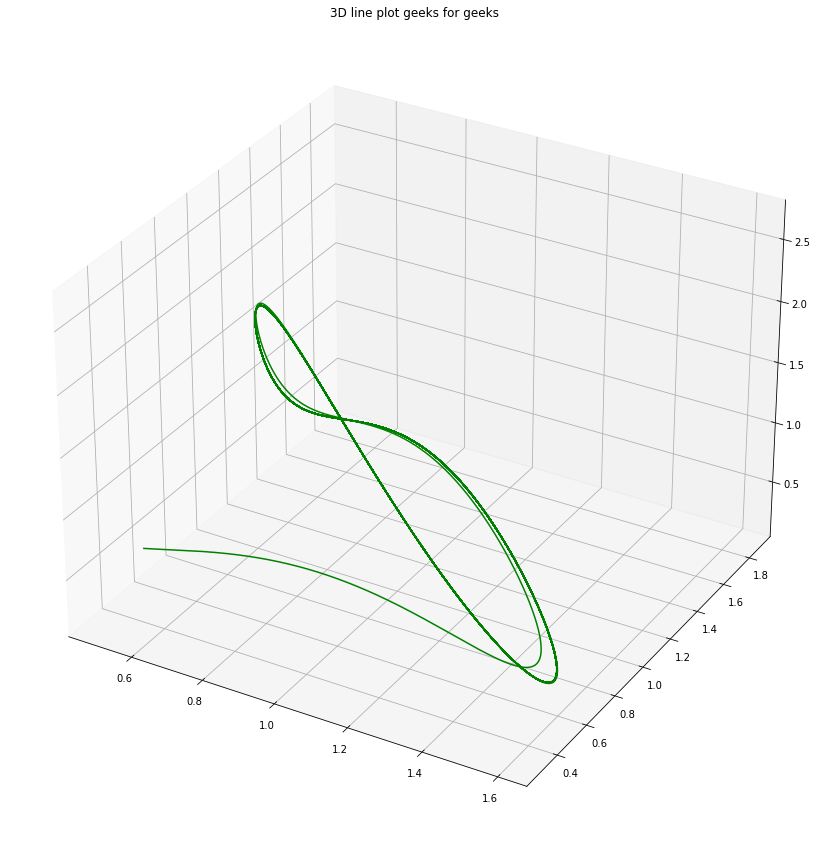

In [93]:
fig = plt.figure(figsize=(15, 15))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting

ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/069d31edeb54fb88a27c537506e67939eed386bb)